<a href="https://colab.research.google.com/github/kuntalKOLE/ML_Supervised_Algorithms/blob/KNN/Knn_1%2C_Feb_21%2C_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to Whatsapp Group - https://chat.whatsapp.com/JdBfqoSeOgoIVc7eeGA07k

# Expectations from you:

This module is heavily dependent on Maths for ML (60%) and Intro to ML (40%)
1. Lectures
2. Assignments (these cover about 30-35% of your learnings)

# BlinkIt Case Study

In [ ]:
import pandas as pd
import numpy as np

!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2


Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 36.6MB/s]


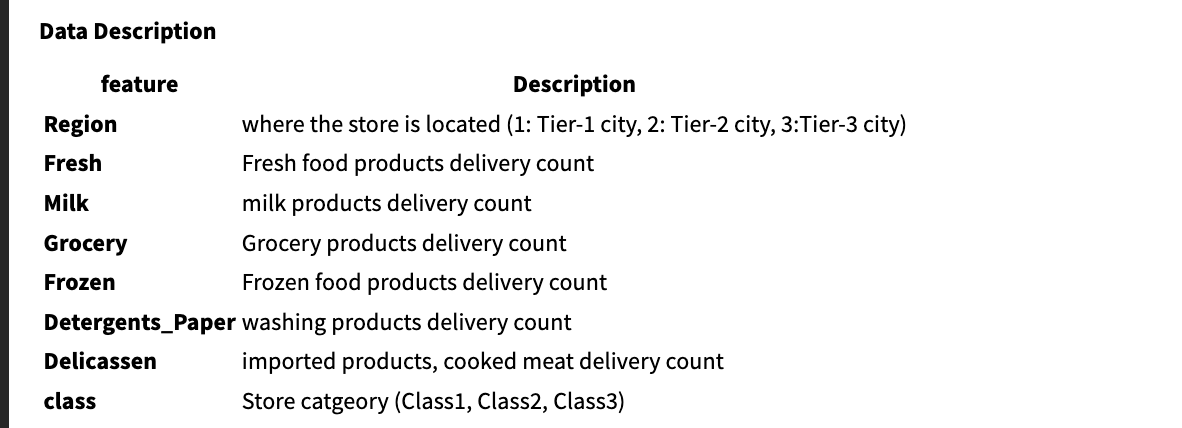

In [ ]:
df=pd.read_csv('multiclass.csv')
df.head()

Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0       3  12669  9656     7561     214              2674        1338      2
1       3   7057  9810     9568    1762              3293        1776      2
2       3   6353  8808     7684    2405              3516        7844      2
3       3  13265  1196     4221    6404               507        1788      1
4       3  22615  5410     7198    3915              1777        5185      1

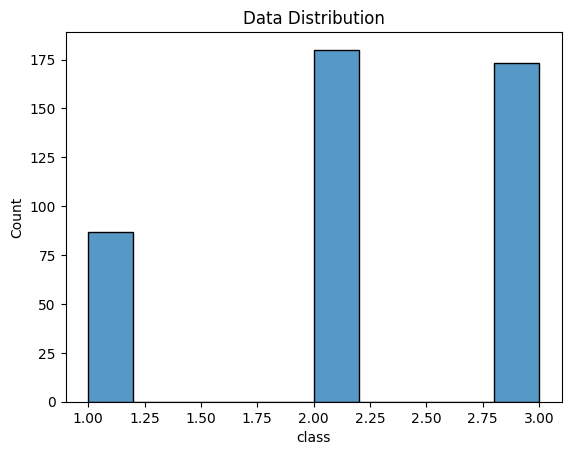

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="class")
plt.title('Data Distribution')
plt.show()

In [ ]:
X=df[['Region', 'Fresh', 'Milk', 'Grocery',  'Frozen',   'Detergents_Paper', 'Delicassen'    ]].copy()
y=df[['class']].copy()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

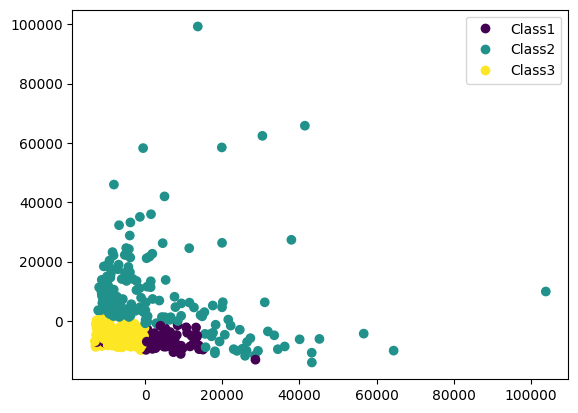

In [ ]:
def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

# reducing features to just 2 features for visualization purpose
pca = PCA(n_components=2)
visualize = pca.fit_transform(X)


scatter_visualize(visualize[:,0] ,visualize[:,1],y.values[:,0])


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

y_sm.value_counts()

class
1        99
2        99
3        99
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

In [ ]:
X_val_scaled[50]


array([ 0.72267226, -0.60118219, -0.44083483, -0.65078922, -0.31355378,
       -0.49757888, -0.28062723])

In [ ]:
# step 1, compute dist b/w Xq and all other points

dist = np.sqrt(np.sum((X_val_scaled[50] - X_sm)**2, axis=1))

dist.shape

(297,)

In [ ]:
# Storing distance and class labels together

distances = [(dist[i], y_sm[i]) for i in range(len(dist))]

distances = sorted(distances)

distances[:5]

[(0.20140380855065576, 3),
 (0.2136084752623933, 3),
 (0.2293650439196766, 3),
 (0.2828497778860899, 3),
 (0.29957647138456167, 3)]

In [ ]:
k = 5

distances = distances[:k]

In [ ]:
distances

[(0.20140380855065576, 3),
 (0.2136084752623933, 3),
 (0.2293650439196766, 3),
 (0.2828497778860899, 3),
 (0.29957647138456167, 3)]

In [ ]:
np.array(distances)[:, 1]

array([3., 3., 3., 3., 3.])

In [ ]:
k = 5

distances = np.array(distances[:k])

classes_counts = np.unique(distances[:, 1], return_counts=True)

index = classes_counts[1].argmax()
pred = classes_counts[0][index]

print('kNN prediction:',pred)

kNN prediction: 3.0


In [ ]:
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

In [ ]:
pred,neighbors = knn(X_sm, y_sm, X_val_scaled[50],5)

print(f'k nearest neighbors with the distance and class label :{neighbors}')

print(f'The predicted class label: {pred}')

k nearest neighbors with the distance and class label :[[0.20140381 3.        ]
 [0.21360848 3.        ]
 [0.22936504 3.        ]
 [0.28284978 3.        ]
 [0.29957647 3.        ]]
The predicted class label: 3


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = []

for i in range(X_test_scaled.shape[0]):
    output,_ = knn(X_sm, y_sm, X_test_scaled[i],5)
    y_pred.append(output)




cm = confusion_matrix(y_test,y_pred)

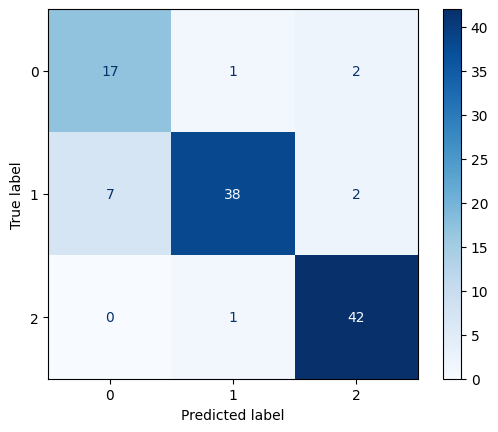

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot(cmap='Blues')

In [ ]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))